In [1]:
import pandas as pd 
struct_distances = pd.read_csv("../../comparison/tmalign/all_distances.csv")

In [2]:
struct_distances["chain1"] = struct_distances["chain1"].apply(lambda s: s.split("/")[-1].split(".")[0])
struct_distances["chain2"] = struct_distances["chain2"].apply(lambda s: s.split(".")[0])
struct_distances

,Unnamed: 0,chain1,chain2,rmsd,moving_tm_score,fixed_tm_score
0,0,1xmkA00,4co8A00,3.08,0.55923,0.47596
1,1,1xmkA00,3iwfB00,3.35,0.48692,0.45279
2,2,1xmkA00,1r7jA00,2.60,0.62223,0.56055
3,3,1xmkA00,2fq3A00,2.32,0.54607,0.51675
4,4,1xmkA00,5it3A00,2.32,0.55082,0.52018
...,...,...,...,...,...,...
6239273,1,2a9dA01,2biiA01,1.54,0.85861,0.89345
6239274,2,2a9dA01,1xdyG00,2.59,0.63389,0.60041
6239275,0,2blfA01,2biiA01,2.11,0.78134,0.85279
6239276,1,2blfA01,1xdyG00,3.17,0.63448,0.63002


In [3]:
UMAP = True
if UMAP:
    raw_latent = pd.read_hdf("../indiv_models/SepModelsHighlightSfamEuclidean-2.30.30.100-umap-all_latent.h5", "table") #"combined-umap-all_latent.h5"
else:
    raw_latent = pd.read_hdf("../indiv_models/SepModelsHighlightSfamEuclidean-2.30.30.100-umap-all.h5", "table") #"combined-umap-all_latent.h5"

In [4]:
raw_latent

,,UMAP Dimension 1,UMAP Dimension 2,ss_score,electrostatics
cathDomain,superfamily,,,,
1xmkA00,1.10.10.10,-1.538081,2.821707,0.194777,0.694795
4co8A00,1.10.10.10,-4.053113,3.241323,0.253359,0.633395
3iwfB00,1.10.10.10,0.163174,2.668097,0.036670,0.830176
1r7jA00,1.10.10.10,-3.185740,2.916071,0.127898,0.807794
2fq3A00,1.10.10.10,0.885942,2.611525,0.000000,0.779402
...,...,...,...,...,...
2a9dA01,3.90.420.10,2.646101,3.759713,0.600000,0.563737
2blfA01,3.90.420.10,1.747021,2.317756,0.665815,0.386514
5k3xB01,3.90.420.10,2.643329,3.014956,0.574274,0.617847


In [5]:
if raw_latent.shape[1]==4:
    raw_latent = raw_latent.drop(columns=["ss_score", "electrostatics"])

In [6]:
raw_latent

,,UMAP Dimension 1,UMAP Dimension 2
cathDomain,superfamily,,
1xmkA00,1.10.10.10,-1.538081,2.821707
4co8A00,1.10.10.10,-4.053113,3.241323
3iwfB00,1.10.10.10,0.163174,2.668097
1r7jA00,1.10.10.10,-3.185740,2.916071
2fq3A00,1.10.10.10,0.885942,2.611525
...,...,...,...
2a9dA01,3.90.420.10,2.646101,3.759713
2blfA01,3.90.420.10,1.747021,2.317756
5k3xB01,3.90.420.10,2.643329,3.014956


In [7]:
from sklearn.metrics import pairwise_distances

In [8]:
raw_latent_dist = pairwise_distances(raw_latent.values, metric="cosine")

In [9]:
domains = raw_latent.reset_index().cathDomain
raw_latent_dist_pd = pd.DataFrame(raw_latent_dist, index=domains, columns=domains)

In [10]:
import numpy as np
raw_latent_dist_masked = raw_latent_dist.copy()
raw_latent_dist_masked[np.triu_indices(raw_latent_dist.shape[0], k = 1)] = -1
raw_latent_dist_masked

array([[ 0.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.07783914,  0.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.1528225 ,  0.4242804 ,  0.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [ 0.65530145,  1.0452331 ,  0.20923132, ...,  0.        ,
        -1.        , -1.        ],
       [ 0.7395104 ,  1.1332395 ,  0.26635164, ...,  0.00390381,
         0.        , -1.        ],
       [ 0.00691539,  0.12962765,  0.09630483, ...,  0.5474795 ,
         0.6279641 ,  0.        ]], dtype=float32)

In [11]:
raw_latent_dist_masked_pd = pd.DataFrame(raw_latent_dist_masked, index=domains, columns=domains)

In [12]:
raw_latent_dist_masked_pd = raw_latent_dist_masked_pd.reset_index().melt(id_vars="cathDomain", var_name="chain2", value_name="Embedding Distance").rename(columns={"cathDomain":"chain1"})

In [13]:
raw_latent_dist_masked_pd2 = raw_latent_dist_masked_pd[raw_latent_dist_masked_pd["Embedding Distance"]>0]

In [14]:
raw_latent_dist_masked_pd3 = pd.merge(raw_latent_dist_masked_pd2, struct_distances, on=["chain1", "chain2"])

In [15]:
struct_distances2 = struct_distances.copy()
struct_distances2 = struct_distances2.rename(columns={"chain1":"chain2_"}).rename(
    columns={"chain2":"chain1", "chain2_":"chain2"})

In [16]:
raw_latent_dist_masked_pd3_5 = pd.merge(raw_latent_dist_masked_pd2, struct_distances2, on=["chain1", "chain2"])

In [17]:
raw_latent_dist_masked_pd3 = pd.concat((raw_latent_dist_masked_pd3, raw_latent_dist_masked_pd3_5))

In [18]:
raw_latent_dist_masked_pd3

,chain1,chain2,Embedding Distance,Unnamed: 0,rmsd,moving_tm_score,fixed_tm_score
0,5lohA02,4nfnA02,0.780246,0,2.87,0.76997,0.67520
1,5lohA02,4aaaA02,0.052102,1,2.03,0.83242,0.73922
2,5lohA02,2izrA02,0.023997,2,2.92,0.77170,0.64648
3,4i92A02,2a2aA02,0.430010,0,3.10,0.67950,0.63879
4,5lohA02,2a2aA02,0.000194,4,2.57,0.82089,0.70626
...,...,...,...,...,...,...,...
5614439,2biiA01,2a9dA01,0.018938,1,1.54,0.85861,0.89345
5614440,1xdyG00,2a9dA01,0.455218,2,2.59,0.63389,0.60041
5614441,2biiA01,2blfA01,0.013142,0,2.11,0.78134,0.85279
5614442,1xdyG00,2blfA01,0.482862,1,3.17,0.63448,0.63002


In [19]:
def get_similarity_groupings(tm):
    if tm<=0.3:
        return "Random Similarity"
    elif 0.3<tm<=0.5:
        return "Similar Architecture"
    else:
        return "Likely Similar Fold"
    

raw_latent_dist_masked_pd3 = raw_latent_dist_masked_pd3.assign(
    Similarity=raw_latent_dist_masked_pd3.moving_tm_score.apply(get_similarity_groupings))

In [20]:
raw_latent_dist_masked_pd3 = raw_latent_dist_masked_pd3.assign(
    **{"1/(Raw Embedding Distance)^2":1/(raw_latent_dist_masked_pd3["Embedding Distance"]**2)}
)

In [21]:
raw_latent_dist_masked_pd3 = raw_latent_dist_masked_pd3.assign(
    **{"-log(Embedding Distance)":-1*raw_latent_dist_masked_pd3["Embedding Distance"].apply(np.log)}
)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
viridis = sns.color_palette("viridis", as_cmap=True)
color_pallete = sns.color_palette(viridis([0, 0.5, 1]))

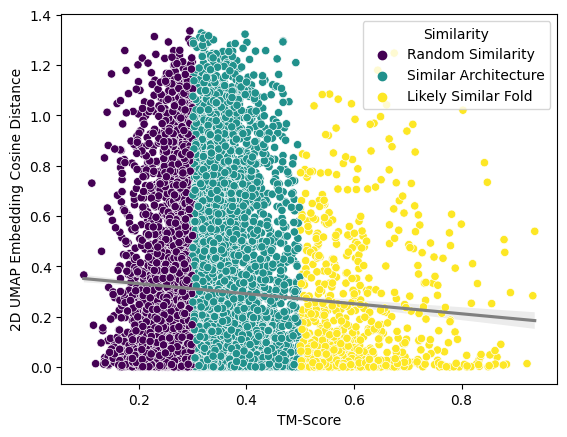

In [24]:

sample = raw_latent_dist_masked_pd3.sample(10000)
fig, ax = plt.subplots()

sns.regplot(data=sample, 
    x="moving_tm_score", y="Embedding Distance",scatter=False, color="#808080")#, hue="Similarity")
sns.scatterplot(data=sample, 
    x="moving_tm_score", y="Embedding Distance", hue="Similarity", ax=ax, 
    hue_order=["Random Similarity", "Similar Architecture", "Likely Similar Fold"],
    palette=color_pallete)
plt.xlabel("TM-Score")
if raw_latent.shape[1] == 2:
    plt.ylabel("2D UMAP Embedding Cosine Distance")
    name = "2D_UMAP_Embedding_Cosine_Distance"
else:
    plt.ylabel(f"Raw {raw_latent.shape[1]}-Embedding Cosine Distance")
    name = f"Raw_{raw_latent.shape[1]}-Embedding_Cosine_Distance"
plt.savefig(f"SH3_Distance_plot_{name}.pdf", dpi=600, bbox_inches="tight")
plt.savefig(f"SH3_Distance_plot_{name}.pdf", dpi=600, bbox_inches="tight")

<Axes: xlabel='Embedding Distance', ylabel='Density'>

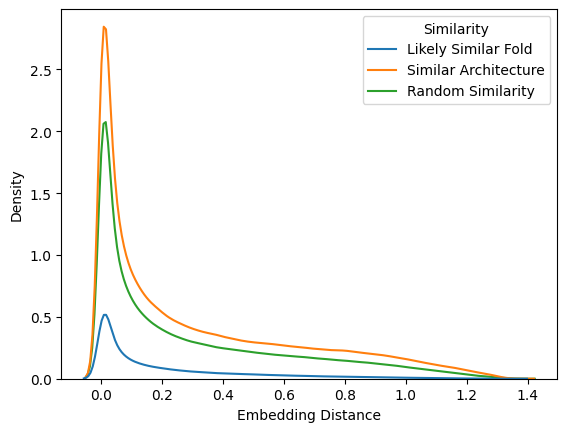

In [25]:
sns.kdeplot(data=raw_latent_dist_masked_pd3, x="Embedding Distance", hue="Similarity")